In [1]:
import numpy as np 
from numpy.linalg import eigh, eig
import cirq

n_qubits = 2
M = 2 ** n_qubits  # size of unitary matrix

H = np.random.rand(M, M) + 1.9j * np.random.rand(M, M)
H = H + H.conj().T
D, U = eigh(H)
np.set_printoptions(precision=2, suppress=False, linewidth=300,
                    floatmode='maxprec_equal')
print(U)

[[-0.26+0.00j  0.68+0.00j  0.43+0.00j -0.54+0.00j]
 [-0.15-0.24j -0.42+0.29j -0.03-0.66j -0.47-0.05j]
 [-0.48+0.24j -0.36-0.35j -0.24+0.43j -0.42-0.20j]
 [ 0.75+0.04j  0.13-0.14j -0.36+0.06j -0.50-0.14j]]


In [69]:
a,b,c = cirq.LineQubit.range(3)

# we can't really cut out a diagonal from the KAK decomposition...
[cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,U,False))[0:4]]

0: ───PhX(-0.496)^0.45────@───PhX(0.841)^0.5──────@───
                          │                       │
1: ───PhX(-0.216)^0.397───@───PhX(-0.809)^0.721───@───

In [3]:
MAGIC=np.array([
    [1, 1j, 0, 0],
    [0, 0, 1j, 1],
    [0, 0, 1j, -1],
    [1, -1j, 0, 0]])

In [4]:
MU = MAGIC @ U @ MAGIC.conj().T
MU

array([[-0.44-0.54j, -0.52-1.56j,  0.46-0.62j,  0.39+0.23j],
       [ 0.02-0.91j, -0.48+0.23j,  0.10+1.35j,  1.02+0.03j],
       [-1.21-0.73j,  0.40-0.20j, -1.00+0.35j, -0.76-0.30j],
       [-0.09-0.81j, -0.56+0.70j,  0.61-0.24j, -0.92+1.12j]])

In [5]:
ev, VV = eig(MU)

In [6]:
f,a,b = cirq.linalg.decompositions.kron_factor_4x4_to_2x2s(VV)

In [7]:
VV @ np.diag([1,2,3,4]) - np.diag([1,2,3,4]) @ VV

array([[ 0.00+0.00j,  0.38-0.16j, -0.97+0.07j, -0.10-0.80j],
       [-0.42-0.28j,  0.00+0.00j,  0.65+0.00j,  0.33+0.03j],
       [-0.09+0.76j, -0.62+0.00j,  0.00+0.00j,  0.09+0.51j],
       [-0.53+0.65j,  0.14-0.74j, -0.06-0.38j,  0.00+0.00j]])

In [8]:
b

array([[ 0.50-0.34j, -0.14+0.70j],
       [-0.11+0.52j,  1.02+0.40j]])

In [9]:
f * np.kron(a,b)

array([[-0.29-9.28e-02j,  0.32-1.60e-01j,  0.06-7.08e-02j,  0.01+1.07e-01j],
       [ 0.24-1.14e-01j, -0.15-5.22e-01j,  0.01+7.87e-02j,  0.16+1.37e-02j],
       [ 0.15+1.48e-01j, -0.25-1.29e-03j,  0.25-3.64e-01j,  0.09+5.11e-01j],
       [-0.18-3.73e-03j, -0.07+3.72e-01j,  0.06+3.77e-01j,  0.79+2.78e-17j]])

In [10]:
decomp = cirq.linalg.kak_decomposition(U)

In [11]:
x_mat = np.array([[0, 1], [1, 0]])
y_mat = np.array([[0, -1j], [1j, 0]])
z_mat = np.array([[1, 0], [0, -1]])

In [12]:
from cirq.linalg.decompositions import *
def interaction_matrix(m: np.ndarray, c: float) -> np.ndarray:
    return map_eigenvalues(np.kron(m, m),
                           lambda v: np.exp(1j * v * c))

In [13]:
decomp.global_phase * (np.kron(*decomp.single_qubit_operations_after)
@ combinators.dot(
                interaction_matrix(z_mat, decomp.interaction_coefficients[2]), 
                interaction_matrix(y_mat, decomp.interaction_coefficients[1]),
                interaction_matrix(x_mat, decomp.interaction_coefficients[0])) 
 @ np.kron(*decomp.single_qubit_operations_before))

array([[-0.26-1.11e-16j,  0.68-1.11e-16j,  0.43+1.53e-16j, -0.54-5.55e-16j],
       [-0.15-2.40e-01j, -0.42+2.89e-01j, -0.03-6.60e-01j, -0.47-4.90e-02j],
       [-0.48+2.35e-01j, -0.36-3.45e-01j, -0.24+4.31e-01j, -0.42-2.03e-01j],
       [ 0.75+3.70e-02j,  0.13-1.36e-01j, -0.36+5.54e-02j, -0.50-1.44e-01j]])

In [14]:
U

array([[-0.26+0.00j,  0.68+0.00j,  0.43+0.00j, -0.54+0.00j],
       [-0.15-0.24j, -0.42+0.29j, -0.03-0.66j, -0.47-0.05j],
       [-0.48+0.24j, -0.36-0.35j, -0.24+0.43j, -0.42-0.20j],
       [ 0.75+0.04j,  0.13-0.14j, -0.36+0.06j, -0.50-0.14j]])

In [15]:
decomp._unitary_()

array([[-0.26-8.33e-17j,  0.68-1.11e-16j,  0.43+2.36e-16j, -0.54-5.00e-16j],
       [-0.15-2.40e-01j, -0.42+2.89e-01j, -0.03-6.60e-01j, -0.47-4.90e-02j],
       [-0.48+2.35e-01j, -0.36-3.45e-01j, -0.24+4.31e-01j, -0.42-2.03e-01j],
       [ 0.75+3.70e-02j,  0.13-1.36e-01j, -0.36+5.54e-02j, -0.50-1.44e-01j]])

In [16]:
combinators.dot(
                interaction_matrix(z_mat, decomp.interaction_coefficients[2]), 
                interaction_matrix(y_mat, decomp.interaction_coefficients[1]),
                interaction_matrix(x_mat, decomp.interaction_coefficients[0])
) 

array([[ 0.98+0.11j,  0.00+0.00j,  0.00+0.00j, -0.02+0.14j],
       [ 0.00+0.00j,  0.52-0.06j,  0.09+0.85j,  0.00+0.00j],
       [ 0.00+0.00j,  0.09+0.85j,  0.52-0.06j,  0.00+0.00j],
       [-0.02+0.14j,  0.00+0.00j,  0.00+0.00j,  0.98+0.11j]])

/Users/balintp/dev/proj/Cirq/cirq/linalg/decompositions.py:655: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


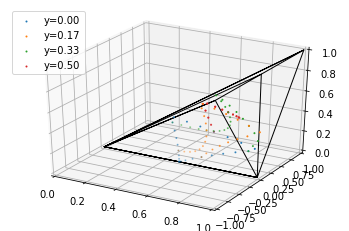

In [17]:
ax = None
for y in np.linspace(0, 0.5, 4):
 a, b = cirq.LineQubit.range(2)
 circuits = [
     cirq.Circuit(
         cirq.CZ(a, b)**0.5,
         cirq.X(a)**y, cirq.X(b)**x,
         cirq.CZ(a, b)**0.5,
         cirq.X(a)**x, cirq.X(b)**y,
         cirq.CZ(a, b) ** 0.5,
     )
     for x in np.linspace(0, 1, 25)
 ]
 ax = cirq.scatter_plot_normalized_kak_interaction_coefficients(
     circuits,
     include_frame=ax is None,
     ax=ax,
     s=1,
     label=f'y={y:0.2f}')
_ = ax.legend()
import matplotlib.pyplot as plt
plt.show()

In [18]:
l, d, r = diagonalize.bidiagonalize_unitary_with_special_orthogonals(KAK_MAGIC_DAG @ U @ KAK_MAGIC)

In [19]:
decomp

cirq.KakDecomposition(
    interaction_coefficients=(0.5831749768965224, 0.43891729732541607, 0.10845772503012241),
    single_qubit_operations_before=(
        np.array([[(-0.6723783711033846+0.6918210076068696j), (0.23263823665903982+0.12316846329457769j)], [(-0.23263823665903985+0.12316846329457762j), (-0.6723783711033847-0.6918210076068699j)]], dtype=np.complex128),
        np.array([[(-0.6727326433923584-0.4284610985308779j), (-0.1373476291231226-0.5873563708127301j)], [(0.13734762912312257-0.5873563708127302j), (-0.6727326433923582+0.42846109853087794j)]], dtype=np.complex128),
    ),
    single_qubit_operations_after=(
        np.array([[(0.10725057716802967-0.2208300127526694j), (0.9619354229702899-0.1200485784994994j)], [(-0.9619354229702897-0.12004857849949929j), (0.10725057716802971+0.22083001275266928j)]], dtype=np.complex128),
        np.array([[(-0.15923068182567823+0.7690679857911789j), (0.05663430979603035-0.6164191578385252j)], [(-0.05663430979602979-0.6164191578385252

In [20]:
np.set_printoptions(precision=2, suppress=True)
l @ KAK_MAGIC_DAG @ U @ KAK_MAGIC @ r

array([[-0.99-0.17j, -0.00-0.00j,  0.00+0.00j,  0.00+0.00j],
       [ 0.00+0.00j,  0.60-0.80j, -0.00-0.00j,  0.00-0.00j],
       [-0.00-0.00j, -0.00+0.00j,  0.30+0.95j, -0.00-0.00j],
       [ 0.00+0.00j, -0.00+0.00j, -0.00-0.00j,  0.02+1.00j]])

In [21]:
 KAK_MAGIC @ l.conj().T @ np.diag(d) @ r.conj().T @ KAK_MAGIC_DAG 

array([[-0.26+0.00j,  0.68+0.00j,  0.43+0.00j, -0.54-0.00j],
       [-0.15-0.24j, -0.42+0.29j, -0.03-0.66j, -0.47-0.05j],
       [-0.48+0.24j, -0.36-0.35j, -0.24+0.43j, -0.42-0.20j],
       [ 0.75+0.04j,  0.13-0.14j, -0.36+0.06j, -0.50-0.14j]])

In [22]:
U

array([[-0.26+0.00j,  0.68+0.00j,  0.43+0.00j, -0.54+0.00j],
       [-0.15-0.24j, -0.42+0.29j, -0.03-0.66j, -0.47-0.05j],
       [-0.48+0.24j, -0.36-0.35j, -0.24+0.43j, -0.42-0.20j],
       [ 0.75+0.04j,  0.13-0.14j, -0.36+0.06j, -0.50-0.14j]])

In [23]:
np.vstack(np.angle(d))

array([[-2.97],
       [-0.93],
       [ 1.26],
       [ 1.55]])

In [24]:
KAK_GAMMA @ np.vstack(np.angle(d))

array([[-0.27],
       [-1.68],
       [ 0.58],
       [-0.44]])

A diagonal on the left side will commute with the CZs on both (b,c) and (a,c). 

In [124]:
def get_exponent(): 
    return 1.2
alpha, beta, gamma = [1 - np.random.random()*2,1 - np.random.random()*2,1 - np.random.random()*2]
circuit = cirq.Circuit([
                        cirq.PhasedXPowGate(phase_exponent=alpha, exponent=get_exponent()).on(a), 
                        cirq.PhasedXPowGate(phase_exponent=alpha/2, exponent=get_exponent()).on(b), 
                        cirq.CZ(a,b),
                        cirq.PhasedXPowGate(phase_exponent=beta, exponent=get_exponent()).on(b),
                        cirq.PhasedXPowGate(phase_exponent=gamma, exponent=get_exponent()).on(a), 
                            cirq.CZ(a,b),
                       ])

print(circuit)
print(circuit._unitary_())
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,circuit._unitary_(),False))

0: ───PhX(0.0178)^-0.8───@───PhX(0.21)^-0.8─────@───
                         │                      │
1: ───PhX(0.0089)^-0.8───@───PhX(-0.619)^-0.8───@───
[[ 0.73-0.44j -0.01-0.46j -0.19+0.08j -0.09-0.08j]
 [-0.43+0.16j  0.21-0.67j -0.04+0.11j -0.46-0.25j]
 [-0.20-0.07j -0.02-0.12j -0.69-0.60j  0.07+0.32j]
 [ 0.10-0.06j  0.18+0.49j -0.27+0.17j -0.77+0.13j]]


0: ───PhX(-0.822)^0.682───@───PhX(0.482)^0.2────@───PhX(-0.0177)^0.837────Z^(-3/11)───
                          │                     │
1: ───PhX(-0.922)^0.645───@───PhX(-0.505)^0.2───@───PhX(-0.00489)^0.837───Z^-0.114────

In [118]:
circuit = cirq.Circuit([
                        cirq.PhasedXPowGate(phase_exponent=alpha, exponent=get_exponent()).on(a), 
                        cirq.PhasedXPowGate(phase_exponent=alpha/2, exponent=get_exponent()).on(b), 
                        cirq.CZ(a,b),
                        cirq.PhasedXPowGate(phase_exponent=beta, exponent=get_exponent()).on(b),
                        cirq.PhasedXPowGate(phase_exponent=gamma, exponent=get_exponent()).on(a), 
                        cirq.CZ(b,c),
                       ])

print(circuit)
print(circuit._unitary_())

0: ───PhX(-0.934)───@───PhX(-0.976)───────
                    │
1: ───PhX(-0.467)───@───PhX(0.638)────@───
                                      │
2: ───────────────────────────────────@───
[[ 0.98-0.20j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j]
 [ 0.00+0.00j  0.98-0.20j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j]
 [ 0.00+0.00j  0.00+0.00j -0.90-0.44j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j]
 [-0.00+0.00j -0.00+0.00j -0.00+0.00j  0.90+0.44j -0.00+0.00j -0.00+0.00j -0.00+0.00j -0.00+0.00j]
 [ 0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.90+0.44j  0.00+0.00j  0.00+0.00j  0.00+0.00j]
 [ 0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.90+0.44j  0.00+0.00j  0.00+0.00j]
 [ 0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.98-0.20j  0.00+0.00j]
 [-0.00+0.00j -0.00+0.00j -0.00+0.00j -0.00+0.00j -0.00+0.00j -0.00+0.00j -0.00+0.00j  0.98+0.20j]]


Now, the question is: how do we extract a diagonal from the left side of the two qubit operator? Preferrably taking a CZ or a CNOT with it :)

In [27]:
cirq.PhasedXPowGate(phase_exponent=alpha, exponent=0.3)._unitary_()

array([[0.79+0.40j, 0.25-0.38j],
       [0.16-0.43j, 0.79+0.40j]])

In [28]:
(cirq.rz(2* (np.pi / 2))**0.312)._unitary_() * 1j

array([[ 0.47+0.88j,  0.00+0.00j],
       [ 0.00+0.00j, -0.47+0.88j]])

In [29]:
(cirq.Z ** 0.312)._unitary_()

array([[1.00+0.00j, 0.00+0.00j],
       [0.00+0.00j, 0.56+0.83j]])

In [30]:
cirq.testing.assert_allclose_up_to_global_phase(
    (cirq.rz(2* (np.pi / 2))**0.312)._unitary_(),
    (cirq.Z ** 0.312)._unitary_(), atol=1e-8)

In [31]:
cirq.testing.assert_allclose_up_to_global_phase(
    (cirq.rz(np.pi)**0.312)._unitary_(),
    (cirq.Z ** 0.312)._unitary_(), atol=1e-8)

In [32]:
cirq.testing.assert_allclose_up_to_global_phase(
    (cirq.rx(np.pi)**0.312)._unitary_(),
    (cirq.X ** 0.312)._unitary_(), atol=1e-8)

In [33]:
cirq.testing.assert_allclose_up_to_global_phase(
    (cirq.PhasedXPowGate(phase_exponent=alpha, exponent=0.3).on(a)._unitary_()),
    cirq.unitary(
        cirq.Circuit([
            cirq.rz(np.pi * -alpha).on(a),
            cirq.rx(np.pi * 0.3).on(a),
            cirq.rz(np.pi * alpha).on(a),
            ])
    ), 
     atol=1e-8)

In [34]:
def decc(ops): 
    for op in ops: 
        g = op.gate
        if g.num_qubits() == 2:
            yield op 
        elif isinstance(g, cirq.PhasedXPowGate):
            yield cirq.rz(np.pi * -g.phase_exponent).on(*op.qubits)
            yield cirq.rx(np.pi * g.exponent).on(*op.qubits)
            yield cirq.rz(np.pi * g.phase_exponent).on(*op.qubits)
        

new_ops = list(decc(cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,U,False)).all_operations()))
new_circ = cirq.Circuit(new_ops)
sub1 = new_circ[0:2] + new_circ[2:5]
print(sub1)
print()
print(sub1._unitary_())
print()
sub2 = new_circ[0:1] + new_circ[2:5] + new_circ[1:2] 
print(sub2)
print()
print(sub2._unitary_())


0: ───Rz(0.496π)───Rx(0.45π)────Rz(-0.496π)───@───Rz(-0.841π)───
                                              │
1: ───Rz(0.216π)───Rx(0.397π)───Rz(-0.216π)───@───Rz(0.809π)────

[[ 0.62+0.03j  0.30-0.33j  0.53+0.02j  0.25-0.29j]
 [ 0.42+0.15j -0.53+0.32j  0.36+0.12j -0.45+0.28j]
 [ 0.45+0.28j  0.36-0.12j -0.53-0.32j -0.42+0.15j]
 [-0.25-0.29j  0.53-0.02j  0.30+0.33j -0.62+0.03j]]

0: ───Rz(0.496π)───Rz(-0.496π)───@───Rz(-0.841π)───Rx(0.45π)────
                                 │
1: ───Rz(0.216π)───Rz(-0.216π)───@───Rz(0.809π)────Rx(0.397π)───

[[ 0.62+0.03j  0.23+0.38j -0.28+0.45j  0.38-0.02j]
 [ 0.02-0.44j -0.53+0.32j  0.32+0.20j  0.03+0.53j]
 [ 0.03-0.53j  0.32-0.20j -0.53-0.32j  0.02+0.44j]
 [-0.38-0.02j  0.28+0.45j -0.23+0.38j -0.62+0.03j]]


In [35]:
from cirq.contrib.paulistring import *

In [36]:
sc = new_circ[0:3]
ConvertToPauliStringPhasors().optimize_circuit(sc)

In [37]:
sc[1].operations[1].pass_operations_over(sc[2].operations)

TypeError: Operation is not a known Clifford and did not decompose into known Cliffords: (cirq.Z**-0.21604966700000006).on(cirq.LineQubit(1))

In [ ]:
cirq.Circuit(cirq.Y(a), cirq.Y(b))._unitary_()

In [190]:
KAK_MAGIC*np.sqrt(2)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+1.j],
       [ 0.+0.j,  0.+1.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+1.j, -1.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.-1.j]])

In [38]:
U

array([[-0.26+0.00j,  0.68+0.00j,  0.43+0.00j, -0.54+0.00j],
       [-0.15-0.24j, -0.42+0.29j, -0.03-0.66j, -0.47-0.05j],
       [-0.48+0.24j, -0.36-0.35j, -0.24+0.43j, -0.42-0.20j],
       [ 0.75+0.04j,  0.13-0.14j, -0.36+0.06j, -0.50-0.14j]])

In [44]:
np.exp(-1j * np.angle(U.diagonal()))

array([-1.00-0.00j, -0.82-0.57j, -0.49-0.87j, -0.96+0.28j])

In [65]:
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,U_real,False))

ValueError: Input must correspond to a 4x4 unitary matrix. Received matrix:
[[ 0.26+0.00j  0.68+0.00j  0.43+0.00j -0.54+0.00j]
 [-0.15-0.24j  0.51+0.00j -0.03-0.66j -0.47-0.05j]
 [-0.48+0.24j -0.36-0.35j  0.50+0.00j -0.42-0.20j]
 [ 0.75+0.04j  0.13-0.14j -0.36+0.06j  0.52+0.00j]]

In [64]:
U_real = np.array(U - np.diag(U.diagonal()) + np.diag(np.abs(U.diagonal())))

In [56]:
np.real(U)

array([[-0.26,  0.68,  0.43, -0.54],
       [-0.15, -0.42, -0.03, -0.47],
       [-0.48, -0.36, -0.24, -0.42],
       [ 0.75,  0.13, -0.36, -0.50]])

In [57]:
np.imag(U)

array([[ 0.00,  0.00,  0.00,  0.00],
       [-0.24,  0.29, -0.66, -0.05],
       [ 0.24, -0.35,  0.43, -0.20],
       [ 0.04, -0.14,  0.06, -0.14]])

In [77]:
SU=U/(np.linalg.det(U)**(1/4))
np.linalg.det(SU)

(0.9999999999999989+0j)

In [78]:
SU

array([[-0.25-0.07j,  0.65+0.18j,  0.42+0.12j, -0.52-0.14j],
       [-0.08-0.27j, -0.48+0.17j,  0.15-0.64j, -0.44-0.17j],
       [-0.52+0.10j, -0.26-0.43j, -0.35+0.35j, -0.35-0.31j],
       [ 0.71+0.24j,  0.16-0.10j, -0.36-0.04j, -0.44-0.27j]])

In [108]:
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b, 
                                                 U                                                 
                                                 , False))

0: ───PhX(-0.496)^0.45────@───PhX(0.841)^0.5──────@───PhX(-0.287)^0.5────@───PhX(0.396)^0.842─────S^-1───────
                          │                       │                      │
1: ───PhX(-0.216)^0.397───@───PhX(-0.809)^0.721───@───PhX(0.191)^0.931───@───PhX(-0.17)^(11/12)───Z^-0.568───

In [109]:
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b, 
                                                 SU                                                 
                                                 , False))

0: ───PhX(-0.496)^0.45────@───PhX(0.841)^0.5──────@───PhX(-0.287)^0.5────@───PhX(0.396)^0.842─────S^-1───────
                          │                       │                      │
1: ───PhX(-0.216)^0.397───@───PhX(-0.809)^0.721───@───PhX(0.191)^0.931───@───PhX(-0.17)^(11/12)───Z^-0.568───

In [239]:
def get_exponent(): 
    return 1.2
alpha, beta, gamma = [1 - np.random.random()*2,1 - np.random.random()*2,1 - np.random.random()*2]
circuit = cirq.Circuit([
                        cirq.CZ(a,b),                        
                        cirq.PhasedXPowGate(phase_exponent=alpha, exponent=get_exponent()).on(a), 
                        cirq.PhasedXPowGate(phase_exponent=alpha/2, exponent=get_exponent()).on(b), 
                        cirq.CZ(a,b),
                        cirq.PhasedXPowGate(phase_exponent=beta, exponent=get_exponent()).on(b),
                        cirq.PhasedXPowGate(phase_exponent=gamma, exponent=get_exponent()).on(a), 
                            cirq.CZ(a,b),
                       ])
def special(u): 
    return u/(np.linalg.det(u)**(1/4))

def g(u):
    yy = np.kron(cirq.Y._unitary_(),cirq.Y._unitary_())
    return u @ yy @ u.T @ yy

np.trace(g(special(circuit._unitary_())))

(-0.8325077971469521+0.35917569227014934j)

In [240]:
np.poly(g(special(circuit._unitary_())))

array([1.00+0.00j, 0.83-0.36j, 1.27+0.00j, 0.83+0.36j, 1.00-0.00j])

In [264]:
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,circuit._unitary_(),False))

0: ───PhX(-0.834)^0.369───@───PhX(-0.742)^0.5─────@───PhX(0.182)^0.5────────@───PhX(0.317)^(7/12)───Z^-0.735───
                          │                       │                         │
1: ───PhX(-0.76)^0.83─────@───PhX(-0.994)^0.854───@───PhX(-0.994)^(14/15)───@───PhX(0.273)^0.83─────Z^(1/8)────

Proposition V.2 in Minimal Universal Two-Qubit...

In [266]:
u = special(circuit._unitary_())
t = g(u.T).T.diagonal()
psi = np.arctan(np.imag(np.sum(t)) / np.real(t[0]+t[1]-t[2]-t[3]))
c_d = cirq.Circuit([cirq.CNOT(a,b),cirq.rz(psi)(b), cirq.CNOT(a,b)])

In [257]:
np.trace(g(special(cirq.Circuit([c_d, circuit])._unitary_())))

(2.6180339887498967-4.440892098500626e-16j)

In [258]:
special(cirq.Circuit([c_d, circuit])._unitary_())

array([[-0.60-0.30j,  0.52-0.04j,  0.37-0.33j,  0.06+0.18j],
       [ 0.49+0.18j,  0.79-0.20j, -0.02+0.19j,  0.15-0.07j],
       [-0.08+0.49j, -0.16-0.10j,  0.77+0.36j,  0.06+0.03j],
       [ 0.10+0.16j,  0.07-0.15j, -0.04-0.05j, -0.76+0.60j]])

In [259]:
special(u @ c_d._unitary_())

array([[-0.60-0.30j,  0.52-0.04j,  0.37-0.33j,  0.06+0.18j],
       [ 0.49+0.18j,  0.79-0.20j, -0.02+0.19j,  0.15-0.07j],
       [-0.08+0.49j, -0.16-0.10j,  0.77+0.36j,  0.06+0.03j],
       [ 0.10+0.16j,  0.07-0.15j, -0.04-0.05j, -0.76+0.60j]])

In [267]:
cirq.Circuit(cirq.two_qubit_matrix_to_operations(a,b,cirq.Circuit([c_d, circuit])._unitary_(),False))

0: ───PhX(-0.738)^(7/16)───@───PhX(-0.0809)^0.2───@───PhX(0.419)^0.296───Z^0.829───
                           │                      │
1: ───PhX(-0.669)^0.716────@───PhX(0.0864)^0.2────@───PhX(0.586)^0.704───Z^0.282───

In [386]:
def special(u):
    return u / (np.linalg.det(u) ** (1 / 4))


def g(u):
    yy = np.kron(cirq.Y._unitary_(), cirq.Y._unitary_())
    return u @ yy @ u.T @ yy


def extract_right_diag(U):
    u = special(U)
    t = g(u.T).T.diagonal()
    print(t, t[0] + t[1] - t[2] - t[3])
    psi = np.arctan(np.imag(np.sum(t)) / np.real(t[0] + t[3] - t[1] - t[2]))
    return cirq.CNOT._unitary_() @ np.kron(np.eye(2), cirq.rz(psi)._unitary_()) @ cirq.CNOT._unitary_()

V = circuit._unitary_() 
dV = extract_right_diag(V)
V = V @ dV
print(cirq.Circuit(
    cirq.optimizers.two_qubit_matrix_to_operations(a, b,V,
                                                       allow_partial_czs=False)))
np.trace(g(special(V)))

[-0.21-0.56j -0.21+0.74j -0.21+0.74j -0.21-0.56j] (-2.7755575615628914e-17+0j)
0: ───PhX(0.208)^0.651───@───PhX(-0.467)^0.2───@───PhX(-0.967)^0.806───Z^(-11/14)───
                         │                     │
1: ───PhX(0.446)^(2/9)───@───PhX(-0.391)^0.2───@───PhX(-0.891)^0.194───Z^0.759──────


(2.618033988749895+4.440892098500626e-16j)

array([[1.+0.09j, 0.+0.00j, 0.+0.00j, 0.+0.00j],
       [0.+0.00j, 1.-0.09j, 0.+0.00j, 0.+0.00j],
       [0.+0.00j, 0.+0.00j, 1.-0.09j, 0.+0.00j],
       [0.+0.00j, 0.+0.00j, 0.+0.00j, 1.+0.09j]])

In [336]:
V @ V.conj().T

array([[ 1.+0.j,  0.+0.j,  0.-0.j,  0.-0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.-0.j,  1.+0.j, -0.-0.j],
       [ 0.+0.j,  0.-0.j, -0.+0.j,  1.+0.j]])

In [390]:
MATRIX =np.array(
    [
        [-0.3084757230-0.2885062819j,  0.1145167366+0.5174637909j,  0.2681040430+0.5761902276j,  0.0617628440-0.3647387979j],
        [ 0.7543017945+0.0000000000j,  0.2762207472+0.1455073226j, -0.1053380593+0.1422696812j, -0.4743936169-0.2777992943j],
        [ 0.0017721185-0.1053245802j,  0.7756399175+0.0000000000j, -0.3594738043-0.0833444936j,  0.5009142542+0.0142653470j],
        [ 0.4891673925-0.0474816905j, -0.0636062791-0.1264271319j,  0.6546911900+0.0000000000j,  0.5566063407+0.0000000000j]
    ]

)
dV = extract_right_diag(MATRIX)
M  = MATRIX  @ dV
print(cirq.Circuit(
    cirq.optimizers.two_qubit_matrix_to_operations(a, b, M ,
                                                       allow_partial_czs=False)))
print(np.trace(g(special(M))))
print(np.poly(g(special(M))))

dV.conj().T

[-0.65+0.03j -0.38+0.02j -0.38+0.02j -0.65+0.03j] (-2.220446049250313e-16+3.469446951953614e-17j)
0: ───PhX(0.835)^0.235────@───PhX(-0.927)^0.306───@───PhX(0.303)^0.346────Z^-0.315───
                          │                       │
1: ───PhX(-0.945)^0.322───@───PhX(0.234)^(2/13)───@───PhX(0.597)^(7/11)───Z^0.381────
(-2.0205593417845558+5.551115123125783e-17j)
[1.00+0.j 2.02+0.j 2.43+0.j 2.02+0.j 1.00+0.j]


array([[1.-0.09j, 0.-0.00j, 0.-0.00j, 0.-0.00j],
       [0.-0.00j, 1.+0.09j, 0.-0.00j, 0.-0.00j],
       [0.-0.00j, 0.-0.00j, 1.+0.09j, 0.-0.00j],
       [0.-0.00j, 0.-0.00j, 0.-0.00j, 1.-0.09j]])

In [355]:
np.trace(g(M))

(0.33791440038083775-0.41381793121136545j)

In [356]:
np.trace(g(MATRIX.T).T @ g(dV))

(0.33791440038083764-0.4138179312113655j)

In [357]:
g(dV)

array([[0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [358]:
dV @ dV

array([[0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [383]:
t = g(MATRIX.T).T.diagonal()
psi = np.arctan(np.imag(np.sum(t)) / np.real(t[0] + t[3] - t[1] - t[2]))

In [385]:
(t[0]+t[3]) * np.exp(-1j*psi) + (t[1]+t[2]) * np.exp(1j*psi)

(-0.820562866787188+2.220446049250313e-16j)

In [376]:
np.real(t[0] + t[1] - t[2] - t[3])

-1.1102230246251565e-16

In [365]:
np.imag(np.sum(t))

-1.2707605952789915

In [366]:
psi

1.5707963267948966

In [378]:
np.imag(np.sum(t)) / np.real(t[0] + t[3] - t[2] - t[3])

6.141641042760594

In [368]:
t

array([-0.51-0.40j, -0.30-0.23j, -0.30-0.23j, -0.51-0.40j])

In [369]:
np.sum(t)

(-1.6123674040409472-1.2707605952789915j)

In [377]:
1/1j

-1j